<a href="https://colab.research.google.com/github/sjw509/Demo/blob/master/%E7%B2%92%E5%AD%90%E7%BE%A4%E7%AE%97%E6%B3%95%E6%B5%8B%E8%AF%95_3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# 电动汽车充电站规划
!pip install scikit-opt
!pip install pypower
import sys
import random
import math
import matplotlib.pyplot as plt 
import numpy as np
from numpy import sin , cos , sum , ones , zeros ,max , abs, conj, pi ,shape, round, dot
from numpy.linalg import inv 
import pandas as pd 
import sko
 
sys.setrecursionlimit(100000000)  # 手工设置递归调用深度，防止无限递归，引起 Python崩溃

In [36]:
def data_import():#部分公共参数导入
  ##导入规划区域交通数据
  #------------------------------------------------------------------------------
  # 交通路径参数 , Data [u, v, cost],节点0-44之间的连通情况及距离/km
  # Python数组索引从0开始 
  datas=[
      [0, 1, 0.93],
      [0, 4, 0.74],
      [0, 5, 0.51],
      [1, 2, 0.93],
      [1, 6, 0.42],
      [2, 3, 0.93],
      [2, 7, 0.42],
      [3, 8, 0.42],
      [4, 9, 0.89],
      [4, 15, 2.64],
      [5, 6, 0.64],
      [5, 9, 1.03],
      [5, 10, 1.28],
      [6, 7, 0.93],
      [6, 12, 0.84],
      [7, 8, 0.93],
      [7, 13, 0.84],
      [8, 14, 0.84],
      [9, 10, 0.74],
      [9, 16, 0.89],
      [10, 11, 0.64],
      [10, 17, 0.40],
      [11, 12, 0.44],
      [11, 18, 0.40],
      [12, 13, 0.93],
      [13, 14, 0.93],
      [13, 19, 0.84],
      [14, 20, 0.84],
      [15, 16, 2.03],
      [15, 21, 0.18],
      [16, 17, 0.90],
      [16, 22, 1.51],
      [16, 23, 0.89],
      [17, 18, 0.64],
      [17, 23, 1.03],
      [18, 19, 0.93],
      [18, 24, 0.84],
      [19, 20, 0.93],
      [19, 25, 0.84],
      [20, 26, 0.84],
      [21, 22, 1.19],
      [21, 27, 1.18],
      [22, 29, 1.25],
      [23, 24, 1.24],
      [23, 29, 1.04],
      [23, 30, 1.03],
      [24, 25, 0.93],
      [24, 30, 1.06],
      [24, 31, 0.84],
      [25, 26, 0.93],
      [25, 32, 0.84],
      [26, 33, 0.84],
      [27, 28, 1.25],
      [28, 34, 1.28],
      [29, 34, 1.28],
      [29, 35, 1.08],
      [30, 31, 0.64],
      [30, 35, 1.07],
      [31, 32, 0.93],
      [31, 37, 0.88],
      [32, 33, 0.93],
      [32, 38, 0.88],
      [33, 39, 0.88],
      [34, 40, 1.25],
      [35, 36, 0.60],
      [35, 40, 1.25],
      [35, 40, 1.04],
      [36, 37, 0.64],
      [36, 41, 1.05],
      [37, 38, 0.93],
      [37, 42, 0.84],
      [38, 39, 0.93],
      [38, 43, 0.84],
      [39, 44, 0.84],
      [40, 41, 0.93],
      [41, 42, 0.93],
      [42, 43, 0.93],
      [43, 44, 1.07],
      [44, 43, 1.07],
  ]

  #-------------------------------------------------------------------------------
  # 45个节点的 x 坐标 
  # 节点15、21的坐标稍作调整！！
  xx = [
      3.71,
      4.64,
      5.57,
      6.5,
      3.1,
      4,
      4.64,
      5.57,
      6.5,
      3.4,
      4,
      4.64,
      4.64,
      5.57,
      6.5,
      1.07,
      3.1,
      4,
      4.64,
      5.57,
      6.5,
      0.92,
      1.85,
      3.4,
      4.64,
      5.57,
      6.5,
      0,
      0.92,
      2.78,
      4,
      4.64,
      5.57,
      6.5,
      1.85,
      3.4,
      4,
      4.64,
      5.57,
      6.5,
      2.78,
      3.71,
      4.64,
      5.57,
      6.5,
  ]
  
  # 45个节点的 y 坐标
  yy = [
      6.5,
      6.5,
      6.5,
      6.5,
      6.08,
      6.08,
      6.08,
      6.08,
      6.08,
      5.24,
      4.8,
      4.8,
      5.24,
      5.24,
      5.24,
      4.4,
      4.4,
      4.4,
      4.4,
      4.4,
      4.4,
      4.3,
      3.56,
      3.56,
      3.56,
      3.56,
      3.56,
      3.56,
      2.72,
      2.72,
      2.72,
      2.72,
      2.72,
      2.72,
      1.84,
      1.84,
      1.84,
      1.84,
      1.84,
      1.84,
      1,
      1,
      1,
      1,
      1,
  ]
  # 生成[x,y]坐标点形成的数组，
  # 供后面查找节点位置使用！！

  node=[0]*45
  for i in range(45):
    node[i]=[xx[i],yy[i]]

  #-------------------------------------------------------------------------------

  # 交通节点数
  n = 45
  
  # 定义无穷大
  inf = 9999999999

  # 充电站点数
  #N = 6 #----------------> N = [4,11] 
  return datas,xx,yy,node,n,inf

#datas,xx,yy,node,n,inf,N = data_import()

In [37]:
def floyd(n,inf,datas): # 求各交通节点之间的 Floyd 最短路径  
  graph = [[(lambda x: 0 if x[0] == x[1] else inf)([i, j]) for j in range(n)] for i in range(n)] ## 构图
  parents = [[i] * n for i in range(n)]  ## 关键地方，i-->j 的父结点初始化都为 i
  ## 用一个二维数组 parents 记录每个结点的父结点。在找最短路的时候，更新父结点。
  for u, v, c in datas:
    graph[u][v] = c  # 若是有向图，边权只赋给graph[u][v]
    graph[v][u] = c  # 若是无向图，要加上这条。# 规划中交通路径应为无向  
  #---------------------------------------------------------------------------------
  # 弗洛伊德算法
  n = len(graph)
  for k in range(n):
      for i in range(n):
          for j in range(n):
              if graph[i][k] + graph[k][j] < graph[i][j]:
                  graph[i][j] = graph[i][k] + graph[k][j]
                  parents[i][j] = parents[k][j]  # 更新父结点
  
  return graph, parents
  
#graph,parents = floyd(n,inf,datas) # 计算出任意两交通节点之间的最短路径，保存在 graph[i][j] 表示 i 到 j 的最短距离

In [38]:
#!!!站址规划初始化，之后的更新站址不需要该部分
def generate_cells(): 
  # 随机生成若干点，初始化充电站地址
  nx=[] # 充电站的横坐标
  ny=[] # 充电站的纵坐标
 
  for i in range(N):
    nx.append(random.uniform(0,7))
    ny.append(random.uniform(0,7))
    nx =[round(a,2) for a in nx] #对随机生成的浮点数取2位小数
    ny =[round(b,2) for b in ny]
  
  cells=[0]*N # 充电站的坐标集
  for j in range(N):
    cells[j]=[nx[j],ny[j]] 
  
  return nx,ny,cells

#x,ny,cells = generate_cells()
#print('充电站坐标：',[nx,ny],'\n')

In [39]:
def near_node(N,nx,ny,xx,yy,node,graph):
  # 计算充电站最近的交通节点
  dmin=[0]*N # 充电站最近的交通节点的欧氏距离
  nd=[0]*N  # 充电站最近交通节点下标

  for j in range(N):
    dmin[j] = math.sqrt((nx[j]-3.71)**2 + (ny[j]-6.5)**2)
    for i in range(45): # 递归计算 45个点中离充电站r最近的点
      d = math.sqrt((xx[i]-nx[j])**2 + (yy[i]-ny[j])**2)
      if d < dmin[j]:    # 考虑 最短的两点欧氏距离 
        dmin[j] = d
        xmin = xx[i]  # 定位最近的交通节点
        ymin = yy[i]  # 交通节点名称像Python数组索引一样由0开始 ！！
        nd[j]= node.index([xmin,ymin]) # --------查找相应下标 
  #dmin[j] = round(dmin[j],2) # 取两位小数
  
  DMIN=[0]*N   # 任一交通点到离充电站的"最短路径距离"
  for j in range(N):
    Dmin=[0]*45
    DMIN[j] = Dmin #?????
    for i in range(45):
      Dmin[i] = graph[i][nd[j]]+dmin[j] 
      #Dmin[i] = round (Dmin[i],3)#取3位小数
  
  return nd,DMIN

#nd,DMIN = near_node(N,nx,ny,xx,yy,node,graph)
#print('任一节点到充电站的最短路径距离 DMIN = ',DMIN,'\n') # N个充电站

In [40]:
def attribution(DMIN,N):
  # 在每个节点到各个充电站距离中选取最近的距离，确定各个服务节点归属充电站
  A=[0]*45 # 各交通节点离充电站最近距离
  Cell=[0]*45 # 各交通节点最近的充电站 

  for i in range(45):
      A[i]=DMIN[0][i]
      for j in range(N):
          if A[i] > DMIN[j][i]:
            A[i] = DMIN[j][i]
            Cell[i] = j #--------------------??????
  #print('各交通节点离充电站最近距离：',A,'\n')
  
  Temp1=np.array(Cell) # 暂时变量，转换为numpy数组查找元素下标
  c=[0]*N # 各充电站的交通节点服务范围
  #-----------------------------------------------------------------------------------------???????? 
  for j in range(N):
    C_1 = np.where(Temp1 == j) # 查找各节点对应最近的充电站（元素位置即交通节点）
    c2=list(C_1)
    c2=c2[0]   # 转换变量类型 tuple -> array -> list
    c[j]=list(c2)
  
  return c,Cell,A

#c,Cell,A = attribution(DMIN,N)

#print('各交通节点最近的充电站：',Cell,'\n')
#print('各充电站的交通节点服务范围c：','\n',c,'\n') # 每个充电站的服务交通节点

In [41]:
def node_Power(N,c):# 根据充电站的服务范围、车流量数据，确定各充电站的充电桩数量
  # 充电站定容
  qs=[         # 45交通节点的车流量数据 #变量名防止与潮流计算的 q 冲突
     2990,
     2626,
     3190,
     2989,
     2940,
     6608,
     6368,
     6200,
     2658,
     6808,
     6420,
     4816,
     5530,
     4654,
     2170,
     3110,
     8068,
     4918,
     4484,
     4080,
     2320,
     2198,
     3628,
     7424,
     6024,
     3870,
     2312,
     422,
     1086,
     3484,
     4118,
     3264,
     4110,
     2370,
     654,
     3132,
     5052,
     5420,
     4802,
     2658,
     1400,
     1476,
     2022,
     1432,
     986 
  ]

  W = [0] * N    # 各个充电站的典型日充电需求量
  alpha = 0.1    # 电动汽车占比
  beta = 0.1     # 有充电需求的电动汽车比例
  Wev = 50       # 电动汽车的平均充电容量(kwh)
  qj = [0] * N   # 各个服务区内的车流量
  lenc = [0] * N # 各服务区交通节点数量
  # c            # 各充电站的服务交通节点范围
 
  for j in range(N):
    lenc[j]=len(c[j]) # 将各个充电站对应服务区内的交通节点对应的车流量累加
    qji = [0]*lenc[j]
    for i in range(lenc[j]):
      cj = [0]*lenc[j]
      cj[i] = (c[j][i])
      qji[i] = qs[cj[i]] 
    qj[j] = sum(qji) 
    W[j] = qj[j] * alpha * beta * Wev 
    W[j] = round(W[j],2) # 取两位小数，减小浮点数加减和二进制存储带来的多位小数影响

  #---------------------------------------------------------------------
  u = 0.2  # 充电站的充电容量裕度
  P = 60  # 单个充电桩充电功率(kw)
  Tt = 16  # 日充电有效时间(h)
  kt = 0.9   # 充电同时率
  keff = 0.9 # 充电效率
  m = [0]*N # 各个充电站的充电桩数量配置

  for j in range(N):
    m[j] = ( W[j]*(1+u)* keff )/ ( P * Tt * kt  )
    m[j] = math.ceil(m[j]) # 对充电桩数量向上取整
  

  return m,W,lenc,qj,qs

#m,W,lenc,qj,qs = node_Power(N,c)

#print('各充电站的充电桩数量配置 m[i]：',m,'\n')
#print('各充电站典型日充电需求量 W[i]：',W,'\n')
#print('各充电站服务交通节点数量 lenc:',lenc,'\n')
#print('各服务区车流量总额 qj:',qj,'\n')

#充电桩数量限制！！！
#m_min = 10
#m_max = 30 
#--->超出上限需重新规划，低于下限取 m = 10 

#??? 思路1： 超出限制 令充电站建设成本无限大？？

In [42]:
def grid_distance(N,nx,ny,m):# 计算充电站最近的配网节点
  # 充电站接入最近的配电网节点
  # IEEE 14节点 配电网节点坐标及负荷
  # 配电网节点x坐标
  # PQ、PU、slack 排序后
  bx = [
      6.2,
      2.5,
      5.3,
      5.3,
      4.0,
      2.5,
      0.5,
      1.5,
      7.5,
      2.5,
      6.2,
      1.2,
      4.0,
      1.2
  ]
  # 配电网节点y坐标
  by = [
      4.5,
      4.5,
      3.5,
      2.5,
      2.5,
      2.5,
      2.0,
      1.5,
      1.5,
      6.0,
      6.0,
      2.5,
      3.5,
      5.0
  ]
  bus = [0]*14
  for k in range(14):
    bus[k] = [bx[k],by[k]]

  dbmin=[0]*N # 充电站最近的配电节点的欧氏距离
  nb=[0]*N  # 充电站最近的配电节点下标

  for j in range(N):
    dbmin[j] = math.sqrt((nx[j]-6.2)**2 + (ny[j]-4.5)**2)
    for i in range(14): # 递归计算,14个点中离充电站最近的点
      db = math.sqrt((bx[i]-nx[j])**2 + (by[i]-ny[j])**2)
      
      if db < dbmin[j]:  # 充电站离配电网节点的最短距离 
        dbmin[j] = db
        bxmin = bx[i]  # 定位最近的配电节点
        bymin = by[i]  
        nb[j]= bus.index([bxmin,bymin])
    
    dbmin[j]=round(dbmin[j],2)
  
  P_s = [0] * N # 各充电站规划的接入的容量（KW）
  for i in range(N):
    P_s[i] = m[i] * 60 / 1000
  
  return bus,bx,by,nb,dbmin,P_s

#bus,bx,by,nb,dbmin,P_s= grid_distance(N,nx,ny)

#print('各充电站接入最近配网节点下标',nb,'\n')
#print('各充电站规划接入容量(MW) P_s:',P_s,'\n')
#print('充电站接入总负荷(MW):',round(sum(P_s),4),'\n')
#print('充电站离配网节点最短距离',dbmin,'\n')


In [43]:
def cal_powerflow(nb,P_s):

  from pypower.case14 import case14
  from pypower.runpf import runpf

  results1,success1 = runpf(case14())
  print('\n\n\n\n---------------------------------------------------------------------------------------------\n\n\n')

  branch1 = results1['branch']
  Ploss1=np.sum(branch1[:,13]+branch1[:,15]) #接入前的有功损耗

  #------------------------------------------------------------
  case_14 = case14()
  case14_branch = case_14['branch']
  gen = case_14['gen']
  case14_bus = case_14['bus']
  bus = case14_bus * 1
  Pg = case14_bus[:,2]  

  # 配网节点接入充电站负荷
  for i in range (N):
      Pg[nb[i],] = Pg[nb[i],] + P_s[i]

  case14_bus[:,2] = Pg
  case_14['bus'] = case14_bus # 修改 电网网络参数 再次计算潮流

  results2,success2 = runpf(case_14)
  branch2 = results2['branch']
  Ploss2=np.sum(branch2[:,13]+branch2[:,15]) # 接入后的有功损耗
  
  # 3.配网约束条件，校验接入充电站后的潮流是否满足要求
  ## 节点容量约束
  Pg_max = gen[:,8] # 节点最大允许有功
  Pg_i = [1,2,3,6,8] # 有限制的节点
  P_i = [0]*len(Pg_i)

  for i in range(len(Pg_i)):
    P_i[i] = Pg_i.index(Pg_i[i])
    if Pg[P_i[i]] > Pg_max[P_i[i]]: # 接入有限制的节点的容量大于最大约束，使配网成本无穷大
      Ploss2 = 1e10
      
  #-----------------------------------------------------------------------------------------------------
  ## 节点电压约束 u_min < u < u_max 
  ## 校验 PQ节点的 电压幅值
  u_max = 1.09 
  u_min = 0.96
  u = case14_bus[:,7]
  u_i = [0,4,5,7,9,11,12,13]

  for i in u_i :
      if u_min <= u[i,] <= u_max :
          print("u constraints succeed! ",'节点',i,'',u[i]) 
      else:
          print("u constraints fail !   ",'节点',i,'',u[i]) 
          Ploss2 = 9*1e10  # 不满足约束 使 配网成本 为 无穷大
  
  return u,Ploss1,Ploss2

#u,Ploss1,Ploss2 = cal_powerflow(nb,P_s)

In [44]:
# 画图部分 

def plotconnect(xx,yy,nx,ny): # 画图显示交通节点之间的路径
  plt.plot(xx,yy,'r.') # 交通节点
  plt.plot(nx,ny,'go') # 充电站

  plt.plot([xx[0],xx[3]],[yy[0],yy[3]],'k--',linewidth=1)
  plt.plot([xx[0],xx[27]],[yy[0],yy[27]],'k--',linewidth=1)
  plt.plot([xx[0],xx[5]],[yy[0],yy[5]],'k--',linewidth=1)
  plt.plot([xx[1],xx[42]],[yy[1],yy[42]],'k--',linewidth=1)
  plt.plot([xx[2],xx[43]],[yy[2],yy[43]],'k--',linewidth=1)
  plt.plot([xx[3],xx[44]],[yy[3],yy[44]],'k--',linewidth=1)
  plt.plot([xx[4],xx[9]],[yy[4],yy[9]],'k--',linewidth=1)
  plt.plot([xx[5],xx[9]],[yy[5],yy[9]],'k--',linewidth=1) 
  plt.plot([xx[5],xx[8]],[yy[5],yy[8]],'k--',linewidth=1)
  plt.plot([xx[5],xx[17]],[yy[5],yy[17]],'k--',linewidth=1)
  plt.plot([xx[9],xx[16]],[yy[9],yy[16]],'k--',linewidth=1)
  plt.plot([xx[9],xx[10]],[yy[9],yy[10]],'k--',linewidth=1)
  plt.plot([xx[10],xx[11]],[yy[10],yy[11]],'k--',linewidth=1)
  plt.plot([xx[12],xx[14]],[yy[12],yy[14]],'k--',linewidth=1)
  plt.plot([xx[15],xx[20]],[yy[15],yy[20]],'k--',linewidth=1)
  plt.plot([xx[16],xx[22]],[yy[16],yy[22]],'k--',linewidth=1)
  plt.plot([xx[16],xx[23]],[yy[16],yy[23]],'k--',linewidth=1)
  plt.plot([xx[17],xx[23]],[yy[17],yy[23]],'k--',linewidth=1)
  plt.plot([xx[21],xx[22]],[yy[21],yy[22]],'k--',linewidth=1)
  plt.plot([xx[22],xx[28]],[yy[22],yy[28]],'k--',linewidth=1)
  plt.plot([xx[22],xx[29]],[yy[22],yy[29]],'k--',linewidth=1)
  plt.plot([xx[23],xx[26]],[yy[23],yy[26]],'k--',linewidth=1)
  plt.plot([xx[23],xx[29]],[yy[23],yy[29]],'k--',linewidth=1)
  plt.plot([xx[23],xx[30]],[yy[23],yy[30]],'k--',linewidth=1)
  plt.plot([xx[24],xx[30]],[yy[24],yy[30]],'k--',linewidth=1)
  plt.plot([xx[27],xx[40]],[yy[27],yy[40]],'k--',linewidth=1)
  plt.plot([xx[29],xx[34]],[yy[29],yy[34]],'k--',linewidth=1)
  plt.plot([xx[29],xx[35]],[yy[29],yy[35]],'k--',linewidth=1)
  plt.plot([xx[30],xx[33]],[yy[30],yy[33]],'k--',linewidth=1)
  plt.plot([xx[30],xx[35]],[yy[30],yy[35]],'k--',linewidth=1)
  plt.plot([xx[35],xx[39]],[yy[35],yy[39]],'k--',linewidth=1)
  plt.plot([xx[35],xx[40]],[yy[35],yy[40]],'k--',linewidth=1)
  plt.plot([xx[36],xx[41]],[yy[36],yy[41]],'k--',linewidth=1)
  plt.plot([xx[40],xx[44]],[yy[40],yy[44]],'k--',linewidth=1)

def plot_text1(N,nx,ny): # 标注充电站名称
  cell_txt =[0]*N
  for j in range(N):
    cell_txt[j] = j
    cell_txt[j] = str(cell_txt[j])
  plt.plot(nx,ny,"go")
  for i in range(len(nx)):
    plt.annotate(cell_txt[i], xy=(nx[i],ny[i]), xytext=(nx[i]+0.1, ny[i]+0.08),color='g',fontsize=16) # 这里xy是需要标记的坐标，xytext是对应的标签坐标

def plot_text2(n,xx,yy): # 标注交通节点名称
  node_txt = [0]*n
  plt.plot(xx,yy,'r.')
  for i in range (n):
    node_txt[i]=i
    node_txt[i]=str(node_txt[i])
    plt.annotate(node_txt[i], xy=(xx[i],yy[i]), xytext=(xx[i]-0.275, yy[i]+0.09),color='r',fontsize=10) 

def plot_text3(bx,by):
  bus_txt = [0]*14
  plt.plot(bx,by,'b*')
  for i in range (14):
    bus_txt[i]=i
    bus_txt[i]=str(bus_txt[i])
    plt.annotate(bus_txt[i], xy=(bx[i],by[i]), xytext=(bx[i]+0.05, by[i]+0.05),color='b',fontsize=14)
  #print(bus_txt)

def plot_N2n(N,nd,nx,ny,xx,yy):  # 画图连接充电站和最近的交通节点
  
  plt.figure() # 默认画布大小
  plt.figure( figsize=(10,8) ) # 画布大小(width,height)

  for j in range(N):
    plt.plot(xx[nd[j]],yy[nd[j]],'r+')
    plt.plot([nx[j],xx[nd[j]]],[ny[j],yy[nd[j]]],'b-.')#--?????????
  
  plotconnect(xx,yy,nx,ny)
  plot_text1(N,nx,ny)
  plot_text2(n,xx,yy)
  
  plt.xlim(0,8) #设置的x、y轴上下限值。
  plt.ylim(0,7)
  plt.grid(False)

def plot_attribution(N,xx,yy,nx,ny): # 可视化各交通节点的归属充电站
  plt.figure() #默认画布大小
  plt.figure( figsize=(10,8) )   #自定义画布大小(width,height)
  
  lenc = [0]*N
  for j in range(N):
    lenc[j]=len(c[j])
    for i in range(lenc[j]):
      plt.plot([xx[c[j][i]],nx[j]],[yy[c[j][i]],ny[j]],'-',linewidth=0.8)
  #plotconnect()
  #plot_N2n
  plot_text1(N,nx,ny)
  plot_text2(n,xx,yy)

def plot_N2b(N,n,nx,ny,nb,bx,by): # 连接充电站和最近的配网节点
  plt.figure()       # 默认画布大小
  plt.figure( figsize=(10,8) )   #自定义画布大小(width,height)
  plt.plot(bx,by,'b*')

  for j in range(N):
    plt.plot([nx[j],bx[nb[j]]],[ny[j],by[nb[j]]],'m-',linewidth=1)

  plotconnect(xx,yy,nx,ny)
  plot_text1(N,nx,ny)
  plot_text3(bx,by)

  plt.xlim(0,8)
  plt.ylim(0,7)
  plt.grid(False)

#plot_N2n(N,nd,nx,ny,xx,yy)
#plot_attribution(N,xx,yy,nx,ny)
#plot_N2b(N,nx,ny,nb,bx,by)

In [45]:
def cal_C1(N,dbmin,m):# C1：充电站的年建设成本
  C1 = [0]*N # 各充电站的年建设成本

  #--------------------------------------------
  # 假定充电站内充电桩数量约束  -------> 充电站的容量约束和数量约束 都由站内充电桩数量约束推导得出
  m_max = 30
  m_min = 10
  
  m_cost = 0 # 充电桩数量限制附加成本，如果在限制区间内，附加成本为0
  for i in range(N):
    if m[i]<= m_min:
      m[i] = m_min   # 不满最小值，按最小值配置
    elif m[i] > m_max :
      m_cost = 9*1e10 # 超过最大值，附加成本无穷大
  #-------------------------------------------
  Pev = 60     # (KW) 单个充电桩的充电功率
  margin = 0.2 #  充电裕度
  Tt = 16      # 日充电有效时间
  kt = 1     # 工作同时率
  keff = 0.9   # 充电效率
  factor = 0.95 # 功率因数
  W = 83645.5  # 规划区域总充电需求 ------!!!


  # 充电站充电桩总容量限制  (KVA)
  # S = kt* (Pev * m) / (factor * keff)
  S_min =  kt* (Pev * m_min) / (factor * keff)  
  S_max =  kt* (Pev * m_max) / (factor * keff)

  # 充电站数量约束 
  # N_min <= N <= N_max ------------------------------------------------------------???
  N_min = np.ceil( W / (S_max*Tt) )
  N_max = np.ceil( W / (S_min*Tt) )

  # 充电站内照明、监控、空调等负荷 20 KW  配置系数为 0.8 
  S_etc = 20 * 0.8  

  # 变压器规格及单价 共 5种
  # 全铜 SCB10 10KV/0.4KV S11型 干式变压器  (含13%增值税)
  trans = np.array([[800,1000,1250,1600,2000,2500],
                    [47000,51700,63300,76700,89100,105100]])

  #  考虑主变的最佳负载率，取 0.8333
  # 充电站主变按 站用容量 1:1.2 配置 
  # N个充电站的主变，一个充电站配一台主变
  S_trans = [0] * N  # 选择主变规格
  S_cost  = [0] * N    # 所选主变的单价
  S_need  = [0] * N
  for i in range(N):
      S_trans[i] = ( kt* (Pev * m[i]) / (factor * keff) + S_etc ) * 1.2 
      S_need[i] = S_trans[i]
      tx = [0] * 6
      tm = 999999
      tk = 0
      for j in range (6):
          tx[j] = trans[0,j] - S_trans[i]   
          if tx[j]>0 and tx[j]<=tm :      # 寻找与所需容量匹配的主变
              tm = tx[j]
              tk = j
      S_trans[i] = trans[0,tk]
      S_cost[i] = trans[1,tk]

  #print('充电站容量约束：',S_min,S_max,'\n')
  #print('各充电站所需容量 /KVA： ',S_need,'\n'  )
  #print('各充电站配置的主变 /KVA ：',S_trans,'\n')
  #print('配置主变对应单价 /元 ：',S_cost )

  r0 = 0.1      # 贴现率
  a = 20        # 充电站的运行年限
  k = (r0*(1+r0)**a)/((1+r0)**a-1) # 贴现率与运行年限构成的系数

  F = 30000    # 充电桩单价 <-------------------------- ！！！
  #E =  1      # 变压器单价 <------------------------ ！！！
  E = S_cost
  c1 =  10000 # (元/Km) 连接配电网线路 单位长度成本 <----- ！！！
  # m         # 各充电站的充电桩数量由服务范围确定
  e = 1       # 变压器数量,简化计算，只配置一台容量匹配的
  l = dbmin   # 各充电站到配电网节点的线路长度
  w = 12000 * m  # 各充电站的基建费用 与充电桩数量规模相关 <---------------!!!!!
   
  for i in range(N):
    C1[i] = (m[i]*F + e*E[i] + l[i]*c1 + w[i])* k
    #C1[i] = C1[i] + m_cost   # 若站内充电桩的数量超过最大值，成本将非常大！！
    #C1[i] = round(C1[i],4)
  
  return C1

#C1 = cal_C1(N,dbmin,m)
#print('各充电站的年建设成本C1:','\n',C1,'\n') # 由于系数的存在 年建设成本 主要与充电桩和变压器的成本相关

In [46]:
def cal_C2(N,C1): # C2 运行成本 (简化后)
  # C2 为 C1 * η
  Eta = 0.01  # 考虑简化，折算比例系数η
  C2=[0]*N
  for i in range(N):
    C2[i] = C1[i]*Eta
    C2[i] = round(C2[i],6)
  return C2

#C2 = cal_C2(N)
#print('各充电站的运行成本C2：','\n',C2,'\n')

In [47]:
def cal_C3(c,qj,qs,lenc,A): # C3 用户出行成本
  # 有充电需求的电动汽车用户，在前往充电站充电的路途中消耗了电动汽车的电能且浪费了自己的时间
  # 即：用户出行成本 = 充电成本 + 时间成本
    
  alpha = 0.1    # 电动汽车占比
  beta = 0.1     # 有充电需求的电动汽车比例
  C3  = [0] * N
  gk  = 6    # 电动汽车每单位电量的行驶距离(km/kWh)
  pev = 0.8  # 电动汽车的充电电价 (元/kWh)
  ct  = 18   # 电动汽车用户的时间成本 (元/h)
  Vev = 30   # 电动汽车的平均车速 （km/h）

  nev =[0]*N   # 充电站i的服务内有充电需求的电动汽车数量(辆)
  for i in range(N):
    nev[i] = qj[i] * alpha * beta
    nev[i] = math.ceil(nev[i]) #  对电动汽车数量向上取整 
  nevi = [[]]*N
  dz = [[]]*N # 第z辆电动汽车到充电站i的行驶距离(km)
  for j in range(N):
    lenc[j]=len(c[j]) # 将各个充电站对应服务区内的交通节点对应的车流量累加
    nevj = [0]*lenc[j]
    dzj = [0]*lenc[j]
    for i in range(lenc[j]):
      cj = [0]*lenc[j]
      cj[i] = (c[j][i])
      dzj[i] = A[cj[i]]
      nevj[i] = math.ceil(qs[cj[i]] * alpha * beta)

    nevi[j]=nevj 
    dz[j] = dzj     
  #print('\n','各服务区内不同行驶距离的充电需求的电动汽车数量：',nevi,'\n')
  #print('各服务区包含的交通节点下标：',c,'\n')
  #print('交通节点离充电站的最短距离',dz,'\n')

  Dz = [[]]*N
  DZ = [0]*N
  for j in range(N):
    Dzj = [0]*lenc[j]
    for i in range(lenc[j]):
      Dzj[i] = dz[j][i] * nevi[j][i]    # 各交通节点需要充电的车辆所行驶距离
    Dz[j] = Dzj
    DZ[j] = sum(Dz[j])
    C3[j] = ( ((DZ[j]/gk) * pev)+((DZ[j]/Vev) * ct) ) * 356
    C3[j] = math.ceil(C3[j])
  
  return nev,C3

#nev,C3 = cal_C3(c,qj,qs)
#print('各服务区内有充电需求的电动汽车数量nev：',nev,'\n')
#print('各充电站的用户出行成本C3:',C3,'\n')

In [48]:
def cal_C4(Ploss1,Ploss2): # 接入配电网后增加的年网损成本
  #print('接入充电站前的网络损耗',Ploss1,'\n')
  #print('接入充电站后的网络损耗',Ploss2,'\n')

  # 增加年网损电量 (MWh)
  Tt = 16 # 充电桩日充电有效时间
  Ploss = 365 * Tt * (Ploss2 - Ploss1)
  print('接入充电站后增加的年网损电量Kwh',Ploss,'\n')

  # 电网公司含税网购平均电价 (元/Kwh)
  pe = 0.4 #    考虑 火电/水电/核电/光伏/风电 ？？？

  # 年网损成本
  C4 = pe * Ploss * 1000
  return C4

#C4 = cal_C4(Ploss1,Ploss2)
#print('年网损成本C4：','\n',C4,'\n')

In [49]:
def cal_C_total(x):
  #nx[0],nx[1],nx[2],nx[3],ny[0],ny[1],ny[2],ny[3] = x # N = 4
  #nx[0],nx[1],nx[2],nx[3],nx[4],ny[0],ny[1],ny[2],ny[3],ny[4]= x # N = 5
  nx[0],nx[1],nx[2],nx[3],nx[4],nx[5],ny[0],ny[1],ny[2],ny[3],ny[4],ny[5]= x # N = 6
  #nx[0],nx[1],nx[2],nx[3],nx[4],nx[5],nx[6],ny[0],ny[1],ny[2],ny[3],ny[4],ny[5],ny[6]= x # N = 7
  #nx[0],nx[1],nx[2],nx[3],nx[4],nx[5],nx[6],nx[7],ny[0],ny[1],ny[2],ny[3],ny[4],ny[5],ny[6],ny[7]= x # N = 8
  #nx[0],nx[1],nx[2],nx[3],nx[4],nx[5],nx[6],nx[7],nx[8],ny[0],ny[1],ny[2],ny[3],ny[4],ny[5],ny[6],ny[7],ny[8]=x # N = 9
  
  datas,xx,yy,node,n,inf = data_import()
  graph,parents = floyd(n,inf,datas)
  nd,DMIN = near_node(N,nx,ny,xx,yy,node,graph)
  c,Cell,A = attribution(DMIN,N)
  m,W,lenc,qj,qs = node_Power(N,c)
  bus,bx,by,nb,dbmin,P_s = grid_distance(N,nx,ny,m)
  u,Ploss1,Ploss2 = cal_powerflow(nb,P_s)

  # 充电桩数量配置约束，必须有最小配置，且不超过最大配置数
  for i in range(N):
    if (m_min/2)<= m[i] < m_min :
      m[i] = m_min
    elif m[i] < (m_min/2):
      m[i] = 1e10    # 排除站点很偏僻的情况 （排除充电桩数小于5的站点）
    elif m[i] > m_max:
      m[i] = 1e10    #  m[i] = 1e10 # 使C1成本趋于无穷 -----> “罚函数？”

  C1 = cal_C1(N,dbmin,m)
  C2 = cal_C2(N,C1)
  nev,C3 = cal_C3(c,qj,qs,lenc,A)
  C4 = cal_C4(Ploss1,Ploss2)


  print('充电站建设成本C1:',C1)
  print('充电站年维护成本C2:',C2)
  print('用户年出行成本C3:',C3) 
  print('电网年网损成本C4:',C4) 
  print('社会总成本C:',sum(C1+C2+C3)+C4) 
  return sum(C1+C2+C3)+C4

流式输出内容被截断，只能显示最后 5000 行内容。
               Total:    272.39     82.44    259.00     73.50

|     Branch Data                                                              |
Brnch   From   To    From Bus Injection   To Bus Injection     Loss (I^2 * Z)  
  #     Bus    Bus    P (MW)   Q (MVAr)   P (MW)   Q (MVAr)   P (MW)   Q (MVAr)
-----  -----  -----  --------  --------  --------  --------  --------  --------
   0      1      2    156.88    -20.40   -152.59     27.68     4.298     13.12
   1      1      5     75.51      3.85    -72.75      2.23     2.763     11.41
   2      2      3     73.24      3.56    -70.91      1.60     2.323      9.79
   3      2      4     56.13     -1.55    -54.45      3.02     1.677      5.09
   4      2      5     41.52      1.17    -40.61     -2.10     0.904      2.76
   5      3      4    -23.29      4.47     23.66     -4.84     0.373      0.95
   6      4      5    -61.16     15.82     61.67    -14.20     0.514      1.62
   7      4      7     28.07     -9.

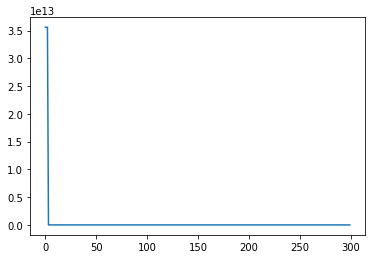

In [50]:
from sko.PSO import PSO 
import matplotlib.pyplot as plt
N = 6
nx = [0] * N
ny = [0] * N
m_min = 10
m_max = 30

pso = PSO(func=cal_C_total, dim=2*N, pop=80, max_iter=300, lb=[0]*2*N, ub=[7]*2*N, w=0.9, c1=0.5, c2=0.5 )
pso.run()
print('best_x is ', pso.gbest_x,'\n', 'best_y is', pso.gbest_y)

plt.plot(pso.gbest_y_hist)
plt.show()

nx: [5.570005962488686, 1.8500091522755746, 3.7127105385889734, 6.500002581186675, 5.570253379498548, 3.3950740947726255] 

nx: [5.239993014058617, 3.559998426198529, 0.0, 3.5599974505318377, 7.0, 5.1301044490808] 

[26, 12, 11, 24, 6, 29] 

充电站 4 充电桩数量约束不满足: m < m_min=10 ------> m=10 



<Figure size 432x288 with 0 Axes>

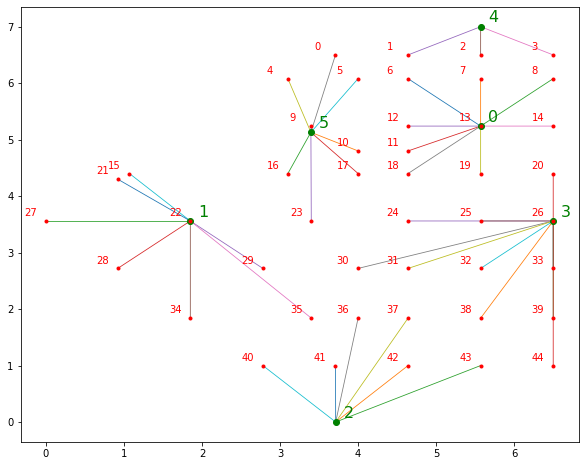

<Figure size 432x288 with 0 Axes>

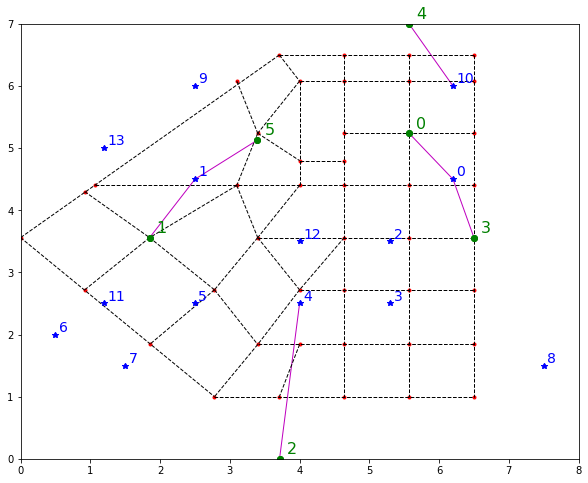

In [51]:
# 观察执行优化算法后的充电站点分布
for i in range(N):
  nx[i] = pso.gbest_x[i]
  ny[i] = pso.gbest_x[N+i]

print('nx:',nx,'\n')
print('nx:',ny,'\n')

datas,xx,yy,node,n,inf = data_import()
graph,parents = floyd(n,inf,datas)
nd,DMIN = near_node(N,nx,ny,xx,yy,node,graph)
c,Cell,A = attribution(DMIN,N)
m,W,lenc,qj,qs = node_Power(N,c)
bus,bx,by,nb,dbmin,P_s = grid_distance(N,nx,ny,m)

print(m,'\n')
for i in range(N):
  if m[i]< m_min :
    print('充电站',i,'充电桩数量约束不满足:','m < m_min=10 ------> m=10','\n')
  elif m[i ]> m_max:
    print('充电站',i,'充电桩数量约束不满足:','m > m_max=30','\n')

plot_attribution(N,xx,yy,nx,ny)
plot_N2b(N,n,nx,ny,nb,bx,by)